<div style="background-color: #00008B; border: 2px solid #391339; border-radius: 800px; padding: 1px; margin: auto;">
 <p style="text-align:center;"><span style="font-size:24px; text-shadow: 1px 1px #000000;"><span style="color:#ccffff;"><span style="font-family:cursive;"> Ex 06</span> </span>  </span></p>
</div>

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

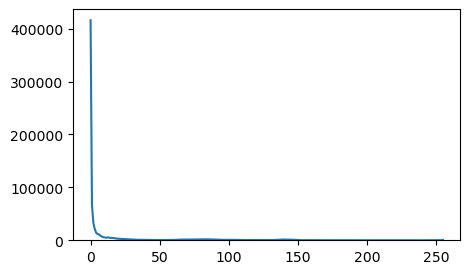

The image needs enhancement because the histogram is badly distributed and is mainly in dark part


In [3]:
img = cv2.imread('sample.jpg',-1)
histogram = cv2.calcHist([img], [0], None, [256], [0, 256])

plt.figure(figsize=[5,3]); plt.plot(histogram); plt.ylim(bottom=0); plt.show()
print('The image needs enhancement because the histogram is badly distributed and is mainly in dark part')

In [4]:
# Contrast Stretching
min_new = 0; max_new = 255
min_old = np.min(img); max_old = np.max(img)

cs_img = np.uint8(((img.copy()-min_old)/(max_old-min_old))*255)

In [19]:
# Contrast Clipping
def contrast_clipping(img,clip_ratio=0.01):
    sorted_pixels = np.sort(img.ravel())
    num_delete = int(len(sorted_pixels)*clip_ratio)
    min_intensity = sorted_pixels[num_delete]
    max_intensity = sorted_pixels[len(sorted_pixels)-num_delete]
    cc_img = img.copy()
    cc_img[cc_img>max_intensity] = 255; cc_img[cc_img<min_intensity] = 0
    cc_img = np.uint8(((cc_img-min_intensity)/(max_intensity-min_intensity))*255)
    return cc_img

cc_img = contrast_clipping(img,clip_ratio=0.03)

In [17]:
# Scale method
scale_img = cv2.convertScaleAbs(img, alpha=2, beta=120)

In [11]:
# Gamma Correction
def gamma_correction(img,gamma=0.5):
    lookUpTable = np.empty((1,256), np.uint8)
    for i in range(256):
        lookUpTable[0,i] = pow(i/255.0, gamma) * 255.0
    gamma_img = cv2.LUT(img, lookUpTable)
    return gamma_img

gamma_img = gamma_correction(img,gamma=0.3)

In [12]:
# Histogram Equalization
equalizied_img = cv2.equalizeHist(img)

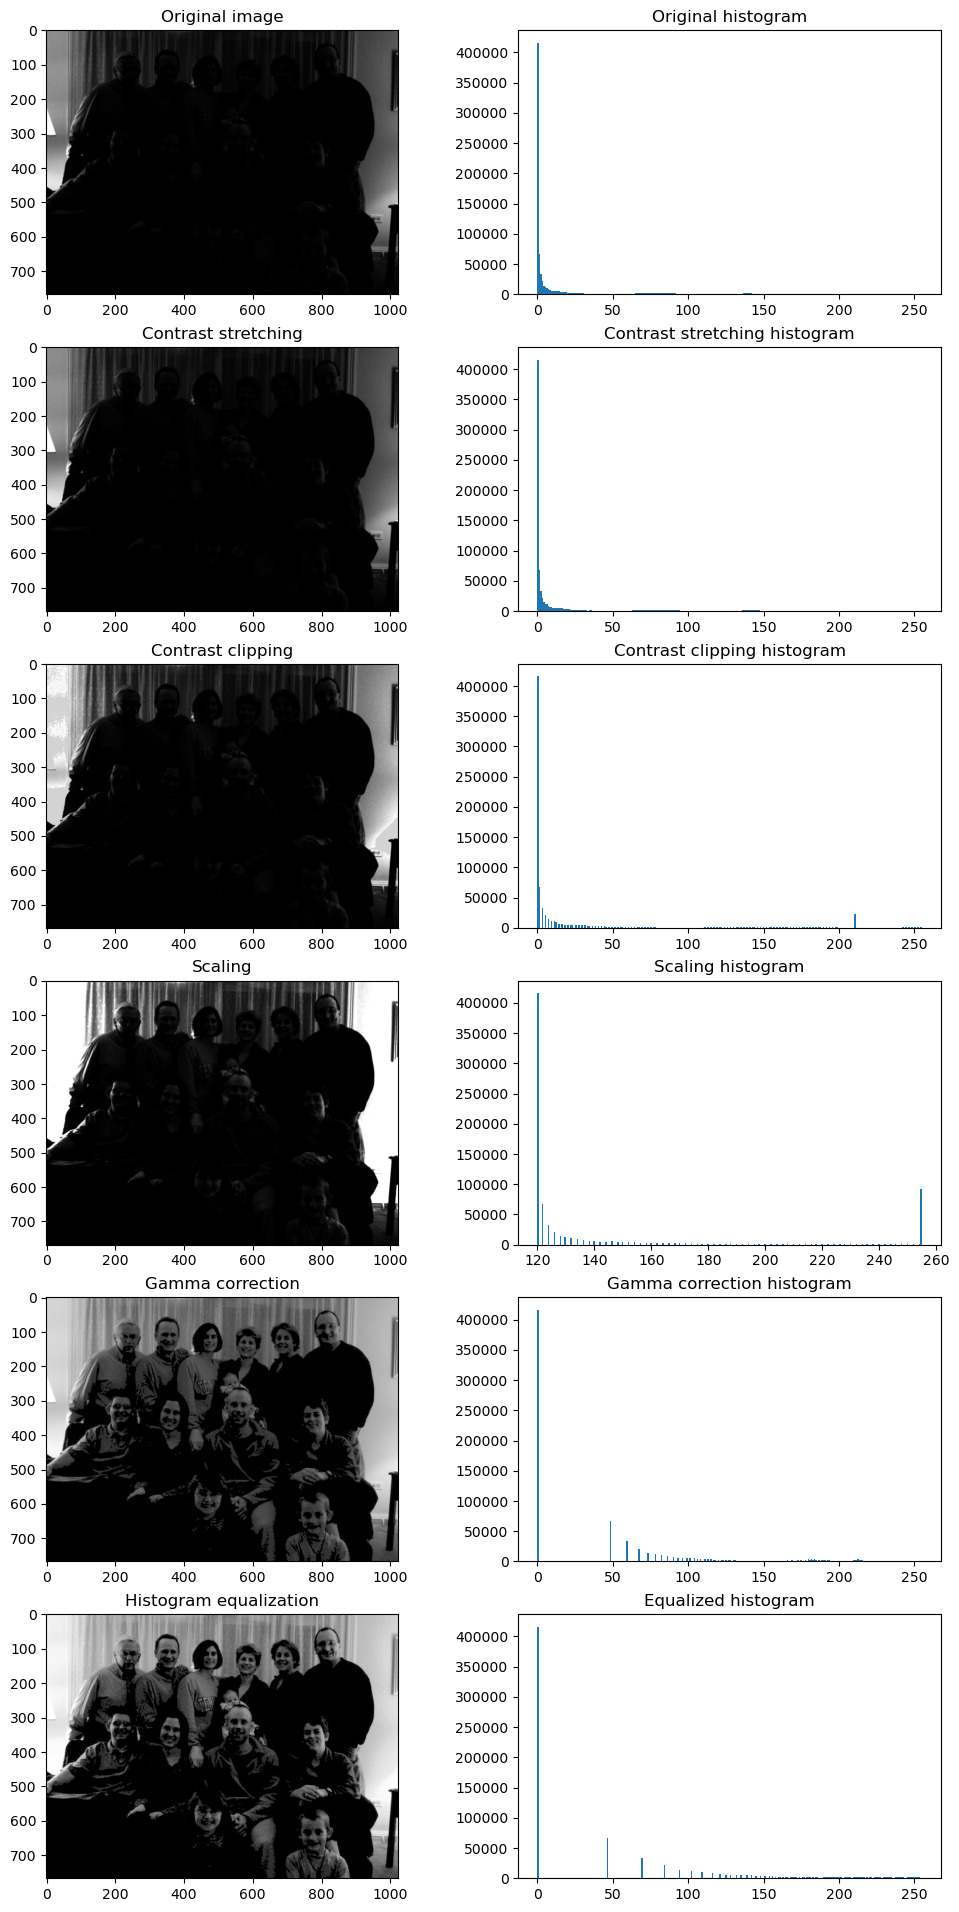

In [20]:
# plotting results
plt.figure(figsize=[12,24])
plt.subplot(621);plt.imshow(img, cmap='gray');                plt.title("Original image");
plt.subplot(622);plt.hist(img.ravel(), 256);                  plt.title("Original histogram");

plt.subplot(623);plt.imshow(cs_img, cmap='gray');             plt.title("Contrast stretching");
plt.subplot(624);plt.hist(cs_img.ravel(), 256);               plt.title("Contrast stretching histogram");
 
plt.subplot(625);plt.imshow(cc_img, cmap='gray');             plt.title("Contrast clipping");
plt.subplot(626);plt.hist(cc_img.ravel(), 256);               plt.title("Contrast clipping histogram");

plt.subplot(627);plt.imshow(scale_img, cmap='gray');          plt.title("Scaling");
plt.subplot(628);plt.hist(scale_img.ravel(), 256);            plt.title("Scaling histogram");

plt.subplot(629);plt.imshow(gamma_img, cmap='gray');          plt.title("Gamma correction");
plt.subplot(6,2,10);plt.hist(gamma_img.ravel(), 256);         plt.title("Gamma correction histogram");

plt.subplot(6,2,11);plt.imshow(equalizied_img, cmap='gray');  plt.title("Histogram equalization");
plt.subplot(6,2,12);plt.hist(equalizied_img.ravel(), 256);    plt.title("Equalized histogram");

### As it was expected the contrast stretching method was compeletely useless. Contrast clipping method did a little better and enhanced the contrast of the image. It is obvious that gamma correction and histogram equalization are the best methods here and both did well; however, the histogram equalization method gave a slightly more realistic picture.